In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2

C:\Users\Max\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def prepare_data(mode):
    """ divides data into images and labels
        Min-Max scales images
    Params:
        mode : String (either "padded" or "resized")
    Returns:
        scaled_X : array with images
        y : array with corresponding labels
        (0 for non-IDC, 1 for IDC)
    """
    patches = glob.glob('./' + mode + '/*.png', recursive=True)
    class0 = []
    class1 = []
    for name in glob.glob('./' + mode + '/*class0.png', recursive=True):
        class0.append(name)
    for name in glob.glob('./' + mode + '/*class1.png', recursive=True):
        class1.append(name)
    X = []
    y = []
    for img_name in patches:
        image = cv2.imread(img_name)
        X.append(image)
        y.append(0) if img_name in class0 else y.append(1)
    scaled_X = np.array(X)/255.0
    return scaled_X, y

In [3]:
X_pad, y = prepare_data("padded")

In [4]:
X_pad_train, X_pad_test, y_pad_train, y_pad_test = train_test_split(X_pad, y, test_size=0.1, random_state=42)

In [5]:
y_pad_train_onehot = np_utils.to_categorical(y_pad_train, 2)
y_pad_test_onehot = np_utils.to_categorical(y_pad_test, 2)

In [3]:
def create_CNN():
    input_shape = (50, 50, 3)
    num_classes = 2
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) # strides=(1, 1) default
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
epochs = 10
batch_size = 128

cnn_pad = create_CNN()
cnn_pad.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              5185000   
__________

In [8]:
pad_fit = cnn_pad.fit(X_pad_train, y_pad_train_onehot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
249771/249771 [==============================] - 213s 854us/step - loss: 0.4104 - acc: 0.8212
Epoch 2/10
249771/249771 [==============================] - 115s 461us/step - loss: 0.3743 - acc: 0.8408
Epoch 3/10
249771/249771 [==============================] - 99s 396us/step - loss: 0.3613 - acc: 0.8465
Epoch 4/10
249771/249771 [==============================] - 100s 399us/step - loss: 0.3516 - acc: 0.8513
Epoch 5/10
249771/249771 [==============================] - 93s 372us/step - loss: 0.3431 - acc: 0.8538
Epoch 6/10
249771/249771 [==============================] - 92s 369us/step - loss: 0.3385 - acc: 0.8570
Epoch 7/10
249771/249771 [==============================] - 91s 365us/step - loss: 0.3303 - acc: 0.8609
Epoch 8/10
249771/249771 [==============================] - 1088s 4ms/step - loss: 0.3253 - acc: 0.8627
Epoch 9/10
249771/249771 [==============================] - 103s 414us/step - loss: 0.3200 - acc: 0.8659
Epoch 10/10
249771/249771 [==============================] -

Test accuracy: 0.8521601268352829


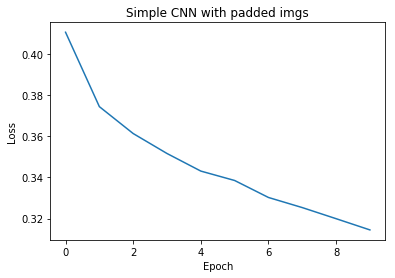

In [9]:
score_pad = cnn_pad.evaluate(X_pad_test, y_pad_test_onehot, verbose=0)
print('Test accuracy:', score_pad[1])

plt.plot(pad_fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simple CNN with padded imgs')
plt.show()

In [5]:
# for comparison with resized imgs
X_inter, y = prepare_data("resized")
X_inter_train, X_inter_test, y_inter_train, y_inter_test = train_test_split(X_inter, y, test_size=0.1, random_state=42)
y_inter_train_onehot = np_utils.to_categorical(y_inter_train, 2)
y_inter_test_onehot = np_utils.to_categorical(y_inter_test, 2)

epochs = 10
batch_size = 128
cnn_inter = create_CNN()
inter_fit = cnn_inter.fit(X_inter_train, y_inter_train_onehot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
249771/249771 [==============================] - 840s 3ms/step - loss: 0.4131 - acc: 0.8202
Epoch 2/10
249771/249771 [==============================] - 147s 589us/step - loss: 0.3763 - acc: 0.8392
Epoch 3/10
249771/249771 [==============================] - 105s 419us/step - loss: 0.3660 - acc: 0.8444
Epoch 4/10
249771/249771 [==============================] - 93s 371us/step - loss: 0.3583 - acc: 0.8475
Epoch 5/10
249771/249771 [==============================] - 94s 375us/step - loss: 0.3502 - acc: 0.8511
Epoch 6/10
249771/249771 [==============================] - 92s 366us/step - loss: 0.3458 - acc: 0.8532
Epoch 7/10
249771/249771 [==============================] - 152s 608us/step - loss: 0.3392 - acc: 0.8561
Epoch 8/10
249771/249771 [==============================] - 112s 448us/step - loss: 0.3358 - acc: 0.8578
Epoch 9/10
249771/249771 [==============================] - 91s 366us/step - loss: 0.3335 - acc: 0.8593
Epoch 10/10
249771/249771 [==============================] - 

Test accuracy: 0.855871437324239


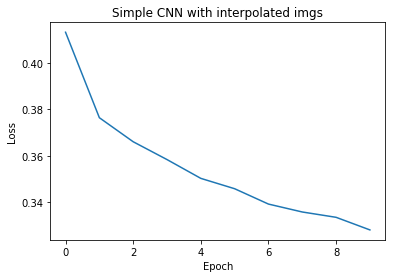

In [6]:
score_inter = cnn_inter.evaluate(X_inter_test, y_inter_test_onehot, verbose=0)
print('Test accuracy:', score_inter[1])

plt.plot(inter_fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simple CNN with interpolated imgs')
plt.show()